# **Imports**


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# **Loading Data**

In [2]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 13s 0us/step


# **Loading Pre-trained MODEL**

In [3]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(96, 96, 3))
base_model.trainable = False

87910968/87910968 [==============================] - 4s 0us/step


# **Building the model**

In [4]:
model = models.Sequential([
    layers.UpSampling2D(size=(3, 3)),
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(10, activation='softmax')
])

# **Compiling & Fitting The Model**

In [5]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=17)

Epoch 1/17
1563/1563 [==============================] - 37s 18ms/step - loss: 1.1892 - accuracy: 0.6042
Epoch 2/17
1563/1563 [==============================] - 27s 17ms/step - loss: 1.0047 - accuracy: 0.6677
Epoch 3/17
1563/1563 [==============================] - 28s 18ms/step - loss: 0.9609 - accuracy: 0.6788
Epoch 4/17
1563/1563 [==============================] - 28s 18ms/step - loss: 0.9379 - accuracy: 0.6866
Epoch 5/17
1563/1563 [==============================] - 28s 18ms/step - loss: 0.9197 - accuracy: 0.6917
Epoch 6/17
1563/1563 [==============================] - 28s 18ms/step - loss: 0.9077 - accuracy: 0.6959
Epoch 7/17
1563/1563 [==============================] - 28s 18ms/step - loss: 0.8998 - accuracy: 0.6959
Epoch 8/17
1563/1563 [==============================] - 27s 18ms/step - loss: 0.8848 - accuracy: 0.7014
Epoch 9/17
1563/1563 [==============================] - 28s 18ms/step - loss: 0.8791 - accuracy: 0.7038
Epoch 10/17
1563/1563 [==============================] - 36s 23m

# **Evaluation**

In [6]:
import numpy as np
from sklearn.metrics import confusion_matrix

y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
conf_matrix = confusion_matrix(test_labels, y_pred_classes)

313/313 [==============================] - 6s 14ms/step


In [7]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(test_labels, y_pred_classes, average='macro')
recall = recall_score(test_labels, y_pred_classes, average='macro')
f1 = f1_score(test_labels, y_pred_classes, average='macro')


In [8]:
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.6534618164494674
Recall: 0.6485
F1 Score: 0.648324085498362


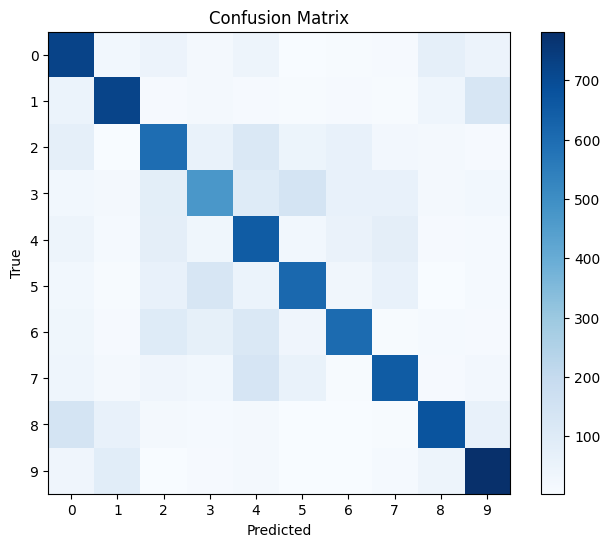

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = range(10)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()